In [1]:
from tensorflow.keras import datasets, layers, models, Input
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
tf.__version__

'2.17.1'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [4]:
model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
logdir='log'

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x=train_images,
         y=train_labels,
         epochs=5,
         validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8889 - loss: 0.3457 - val_accuracy: 0.9862 - val_loss: 0.0432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9899 - val_loss: 0.0324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9894 - val_loss: 0.0363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9895 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9879 - val_loss: 0.0367


In [8]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
y_pred_labels = np.argmax(y_pred, axis=1)

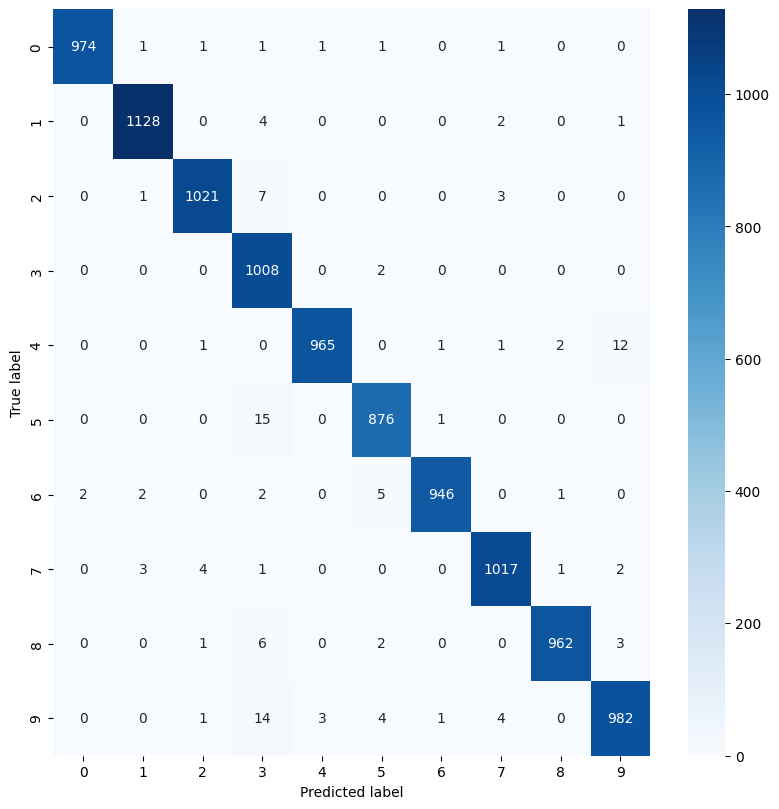

In [10]:
cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_labels).numpy()
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label') 
plt.xlabel('Predicted label')
plt.show()

In [11]:
cm

array([[ 974,    1,    1,    1,    1,    1,    0,    1,    0,    0],
       [   0, 1128,    0,    4,    0,    0,    0,    2,    0,    1],
       [   0,    1, 1021,    7,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0, 1008,    0,    2,    0,    0,    0,    0],
       [   0,    0,    1,    0,  965,    0,    1,    1,    2,   12],
       [   0,    0,    0,   15,    0,  876,    1,    0,    0,    0],
       [   2,    2,    0,    2,    0,    5,  946,    0,    1,    0],
       [   0,    3,    4,    1,    0,    0,    0, 1017,    1,    2],
       [   0,    0,    1,    6,    0,    2,    0,    0,  962,    3],
       [   0,    0,    1,   14,    3,    4,    1,    4,    0,  982]])

In [12]:
# Calcular Falsos Positivos (FP) e Falsos Negativos (FN)
fp = (np.sum(cm, axis=0) - np.diag(cm)).sum()
fn = (np.sum(cm, axis=1) - np.diag(cm)).sum()

print(f"Falsos Positivos (FP) totais: {fp}")
print(f"Falsos Negativos (FN) totais: {fn}")


Falsos Positivos (FP) totais: 121
Falsos Negativos (FN) totais: 121


In [13]:
vp = np.diag(cm).sum()
vn = vp

In [14]:
sensibilidade_recall = vp/(vp+fn)
especificidade = vn/(vn+fp)
acuracia = (vp)/(vp+fp)
precisao = vp/(vp+fp)
f_score = 2*(precisao*sensibilidade_recall)/(precisao+sensibilidade_recall)
print('Sensibilidade (recall):', sensibilidade_recall)
print('Especificidade:', especificidade)
print('Acurácia:', acuracia)
print('Precisão:', precisao)
print('F-Score:', f_score)

Sensibilidade (recall): 0.9879
Especificidade: 0.9879
Acurácia: 0.9879
Precisão: 0.9879
F-Score: 0.9879


In [15]:
rec = recall_score(y_true, y_pred_labels,average='micro')
rec

0.9879

In [16]:
prec = precision_score(y_true, y_pred_labels,average='micro')
prec

0.9879

In [17]:
f = f1_score(y_true, y_pred_labels,average='micro')
f

0.9879

In [18]:
ac = accuracy_score(y_true, y_pred_labels)
ac

0.9879